# 7. 信號處理與時間序列

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [3]:
import statsmodels

## 7.1 statsmodels 子庫

In [4]:
import pkgutil as pu
import pydoc

def clean(astr):
    s = astr
    # remove multiple spaces
    s = ' '.join(s.split())
    s = s.replace('=','')
    return s

def print_desc(prefix, pkg_path):
    for pkg in pu.iter_modules(path=pkg_path): # iterate 每一個 modules
        name = prefix + "." + pkg[1]
        
        if pkg[2] == True:
            try:
                docstr = pydoc.plain(pydoc.render_doc(name))  # 取出每個 module 的 DocString
                docstr = clean(docstr)
                start = docstr.find("DESCRIPTION")
                docstr = docstr[start: start + 140]
                print(name, docstr)
            except:
                continue

# print("statsmodels version", statsmodels.__version__)
print_desc("statsmodels", statsmodels.__path__)

statsmodels.base 
statsmodels.compat 
statsmodels.datasets 
statsmodels.discrete 
statsmodels.distributions 
statsmodels.duration 
statsmodels.emplike 
statsmodels.formula 
statsmodels.genmod 
statsmodels.graphics 
statsmodels.imputation 
statsmodels.interface 
statsmodels.iolib 
statsmodels.miscmodels 
statsmodels.multivariate 
statsmodels.nonparametric DESCRIPTION For an overview of this module, see docs/source/nonparametric.rst PACKAGE CONTENTS _kernel_base _smoothers_lowess api bandwidths
statsmodels.regression 
statsmodels.resampling 
statsmodels.robust 
statsmodels.sandbox 
statsmodels.src 
statsmodels.stats 
statsmodels.tools 
statsmodels.tsa 


## 7.2 移動平均值

In [5]:
import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from pandas.stats.moments import rolling_mean
# data_loader = sm.datasets.sunspots.load_pandas()
data_loader = statsmodels.datasets.sunspots.load_pandas()
data_loader

<class 'statsmodels.datasets.utils.Dataset'>

In [6]:
df = data_loader.data
df.tail()

,YEAR,SUNACTIVITY
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


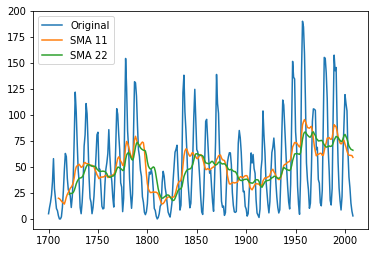

In [7]:
year_range = df["YEAR"].values

plt.plot(year_range, df["SUNACTIVITY"].values, label="Original")
plt.plot(year_range, df["SUNACTIVITY"].rolling(window=11,center=False).mean(), label="SMA 11")  # rolling_mean()
plt.plot(year_range, df["SUNACTIVITY"].rolling(window=22,center=False).mean(), label="SMA 22")  # rolling_mean() 

plt.legend()
plt.show()

## 7.3 窗口函數

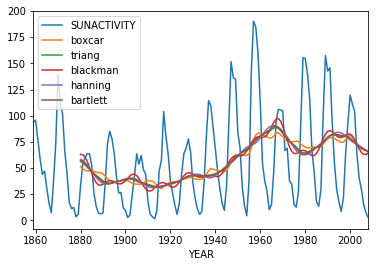

In [8]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data.tail(150)
df = pd.DataFrame({'SUNACTIVITY':df['SUNACTIVITY'].values}, index=df['YEAR'])
ax = df.plot()  # 取得 axes

#  Series.rolling()
def get_window_data(source_series, df, win_type): 
    df[win_type] =  source_series.rolling(window=22, win_type = win_type).mean()  # rolling_mean()    

df2 = DataFrame()
source_series = df["SUNACTIVITY"]

for method in ['boxcar', 'triang', 'blackman', 'hanning', 'bartlett']:
    get_window_data(source_series, df2, method)
    
df2.plot(ax = ax);  # 指定 axes

## 7.4 協整(cointergration)的定義
[Augmented Dickey–Fuller test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)  
[擴張的Dickey-Fuller檢定](https://zh.wikipedia.org/wiki/%E6%93%B4%E5%BC%B5%E7%9A%84Dickey-Fuller%E6%AA%A2%E5%AE%9A  )

In [9]:
import statsmodels.api as sm
from pandas.stats.moments import rolling_window
import pandas as pd
import statsmodels.tsa.stattools as ts
import numpy as np


def calc_adf(x, y):
    result = sm.OLS(x, y).fit()    
    return ts.adfuller(result.resid)


data_loader = sm.datasets.sunspots.load_pandas()
data = data_loader.data.values
N = len(data)

t = np.linspace(-2 * np.pi, 2 * np.pi, N)

sine = np.sin(np.sin(t))
print("Self ADF", calc_adf(sine, sine))

Self ADF (-2.3384431270005816e-16, 0.95853208606005602, 0, 308, {'1%': -3.4517611601803702, '5%': -2.8709700936076912, '10%': -2.5717944160060719}, -21598.896016765088)


In [10]:
noise = np.random.normal(0, .01, N)
print("ADF sine with noise", calc_adf(sine, sine + noise))

ADF sine with noise (-17.91976047102758, 2.9090696573683176e-30, 0, 308, {'1%': -3.4517611601803702, '5%': -2.8709700936076912, '10%': -2.5717944160060719}, -1872.6867321887185)


In [11]:
cosine = 100 * np.cos(t) + 10
print("ADF sine vs cosine with noise", calc_adf(sine, cosine + noise))

ADF sine vs cosine with noise (-15.250185500656697, 5.0218440878103841e-28, 16, 292, {'1%': -3.4529449243622383, '5%': -2.8714895534256861, '10%': -2.5720714378870331}, -10757.268006194223)


In [12]:
print("Sine vs sunspots", calc_adf(sine, data))

Sine vs sunspots (-6.7242691810700972, 3.4210811915549913e-09, 16, 292, {'1%': -3.4529449243622383, '5%': -2.8714895534256861, '10%': -2.5720714378870331}, -1102.5867415291168)


## 7.5 自相關

norm: 504015.031133


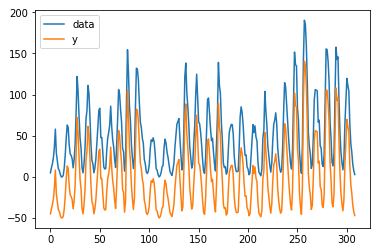

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot


data_loader = sm.datasets.sunspots.load_pandas()
data = data_loader.data["SUNACTIVITY"].values  # SUNACTIVITY 數據
y = data - np.mean(data)  # 與 mean 的差
norm = np.sum(y ** 2)  # 與 mean 的差 的平方和
print('norm:', norm)

plt.plot(data, label = 'data')  # SUNACTIVITY 數據
plt.plot(y, label = 'y');  # 與 mean 的差
plt.legend();

In [14]:
# 計算自己內部的 correlation，因為 mode = 'full', 所以會逐元素錯開，所以 len(correlated) = len(y) * 2 - 1
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.correlate.html
correlated = np.correlate(y, y, mode='full')/norm   # 注意： mode : {‘valid’, ‘same’, ‘full’}, optional

res = correlated[int(len(correlated)/2):]  # 後半段
print(np.argsort(res)[-5:])  # 使用 argsort，找出最大的五個數值的 indice

[ 9 11 10  1  0]


In [15]:
res[9], res[11], res[10], res[1], res[0]

(0.47309753089805962,
 0.65029081984070403,
 0.65898001553633778,
 0.82020129442002232,
 1.0)

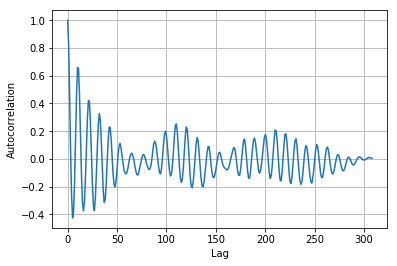

In [16]:
plt.plot(res)  # 繪製逐元素錯開所計算出來的 correlations
plt.grid(True)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

# 錯開 0 個元素的時候，因為完全相同，所以 correlations = 1
# 每錯位幾個元素，correlation 會來回擺盪，表示原始訊號本身有週期

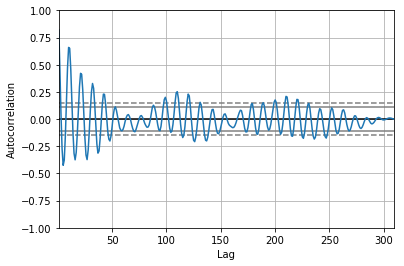

In [17]:
# autocorrelation_plot，會自動計算每個點與平均值的差異 y，並益算 np.correlate(y, y, mode='full') 求出訊號遞移之時的 自身 correlations
autocorrelation_plot(data);

## 7.6 自回歸模型

In [18]:
from scipy.optimize import leastsq
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np


def model(p, x1, x10):
    p1, p10 = p
    return p1 * x1 + p10 * x10

def error(p, data, x1, x10):
    return data - model(p, x1, x10)

def fit(data):
    p0 = [.5, 0.5]
#     print( data)
#     print( data[10:], data[9:-1], data[:-10])
    params = leastsq(error, p0, args=(data[10:], data[9:-1], data[:-10]))[0] # leastsq() 最小平方法
    return params

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
sunspots[:5]

array([  5.,  11.,  16.,  23.,  36.])

In [19]:
cutoff = int(.9 * len(sunspots))
params = fit(sunspots[:cutoff])
print("Params", params)

Params [ 0.67172672  0.33626295]


In [20]:
pred = params[0] * sunspots[cutoff-1:-1] + params[1] * sunspots[cutoff-10:-10]
actual = sunspots[cutoff:]
print("Root mean square error", np.sqrt(np.mean((actual - pred) ** 2)))
print("Mean absolute error", np.mean(np.abs(actual - pred)))
print("Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/actual))

Root mean square error 22.8148122613
Mean absolute error 17.6515446503
Mean absolute percentage error 60.7817800736


In [21]:
mid = (actual + pred)/2
print("Symmetric Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/mid))
print("Coefficient of determination", 1 - ((actual - pred) ** 2).sum()/ ((actual - actual.mean()) ** 2).sum())

Symmetric Mean absolute percentage error 34.9843386176
Coefficient of determination 0.799940292779


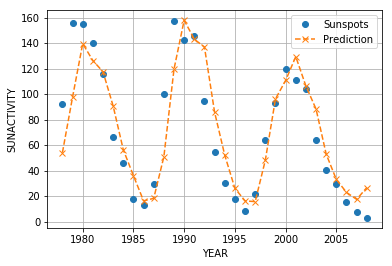

In [22]:
year_range = data_loader.data["YEAR"].values[cutoff:]
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x--', label="Prediction")
plt.grid(True)
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")
plt.legend()
plt.show()

## 7.7 ARMA 模型

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime

data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
years = df["YEAR"].values.astype(int)
df.index

RangeIndex(start=0, stop=309, step=1)

In [24]:
sm.tsa.datetools.dates_from_range(str(years[0]), str(years[-1]))[:3]

[datetime.datetime(1700, 12, 31, 0, 0),
 datetime.datetime(1701, 12, 31, 0, 0),
 datetime.datetime(1702, 12, 31, 0, 0)]

In [25]:
df.index = pd.Index(sm.tsa.datetools.dates_from_range(str(years[0]), str(years[-1])))
del df["YEAR"]
df.index 

DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31',
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', length=309, freq=None)

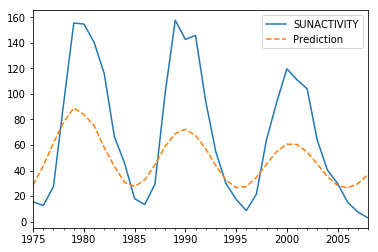

In [26]:
model = sm.tsa.ARMA(df, (10,1)).fit()  # 使用 sm.tsa.ARMA() 建立 model
prediction = model.predict('1975', str(years[-1]), dynamic=True)  # 使用 model 預測

df['1975':].plot()  # 實際資料
prediction.plot(style='--', label='Prediction')  # 預測資料
plt.legend();
plt.show()

## 7.8 生成週期訊號

In [27]:
from scipy.optimize import leastsq
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np


def model(p, t):
    C, p1, f1, phi1 , p2, f2, phi2, p3, f3, phi3 = p
    return C + p1 * np.sin(f1 * t + phi1) + p2 * np.sin(f2 * t + phi2) +p3 * np.sin(f3 * t + phi3)

def error(p, y, t):
    return y - model(p, t)

def fit(y, t):
    p0 = [y.mean(), 0, 2 * np.pi/11, 0, 0, 2 * np.pi/22, 0, 0, 2 * np.pi/100, 0]
    params = leastsq(error, p0, args=(y, t))[0]
    return params

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values

cutoff = int(.9 * len(sunspots))
params = fit(sunspots[:cutoff], years[:cutoff])
print("Params", params)

Params [ 47.18799995  28.8994747    0.56827278   6.51179623   4.55214498
   0.29372078 -14.30928312 -18.16524174   0.06574835  -4.37789391]


In [28]:
pred = model(params, years[cutoff:])
actual = sunspots[cutoff:]
print("Root mean square error", np.sqrt(np.mean((actual - pred) ** 2)))
print("Mean absolute error", np.mean(np.abs(actual - pred)))
print("Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/actual))
mid = (actual + pred)/2
print("Symmetric Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/mid))
print("Coefficient of determination", 1 - ((actual - pred) ** 2).sum()/ ((actual - actual.mean()) ** 2).sum())

Root mean square error 59.5620575957
Mean absolute error 44.5815868755
Mean absolute percentage error 65.1645745858
Symmetric Mean absolute percentage error 78.4480682874
Coefficient of determination -0.363531623002


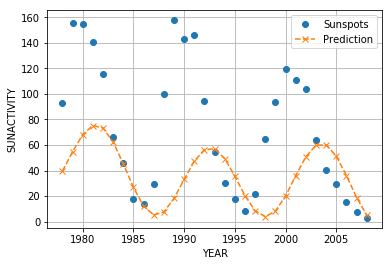

In [29]:
year_range = data_loader.data["YEAR"].values[cutoff:]
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x--', label="Prediction")
plt.grid(True)
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")
plt.legend()
plt.show()

## 7.9 Fourier 傅立葉分析

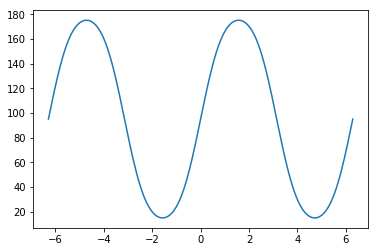

In [30]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values

t = np.linspace(-2 * np.pi, 2 * np.pi, len(sunspots))  # 頻域的時間範圍

mid = np.ptp(sunspots)/2  # 最大-最小 的一半
sine = mid + mid * np.sin(np.sin(t))  # sine wave，以 mid 為基準，加上 mid * sin(sin(t)) ＝> 週期是 sin(t)

plt.plot(t, sine);

In [31]:
transformed = np.abs(fftshift(rfft(sunspots)))  # 對 sunspots 原始資料做 FFT，並將 0 Hz 放到中央
transformed[:3]

array([ 234.87273536,   78.46748602,   17.87315559])

In [32]:
main_freqs = np.argsort(transformed)[-5:]
print("Indices of max sunspots FFT", main_freqs)  # sunspots 能量最大的五個頻率，主頻率 = 154 Hz

Indices of max sunspots FFT [205 212 215 209 154]


In [33]:
sunspots_main_freq = main_freqs[-1]
sunspots_main_freq

154

In [34]:
print("magnitudes of max sunspots FFT", transformed[main_freqs])  # sunspots 最大的五個頻率之能量
transformed[main_freqs]

magnitudes of max sunspots FFT [  2221.09778837   2575.90973017   3046.40825688   4391.78226526  15373.4       ]


array([  2221.09778837,   2575.90973017,   3046.40825688,   4391.78226526,
        15373.4       ])

In [35]:
sine_fft = np.abs(fftshift(rfft(sine)))  # sine wave: 以 mid 為基準，加上 mid * sin(sin(t)) ＝> 週期應該是 sin(t)
print("Index of max sine FFT", np.argsort(sine_fft)[-5:])  # sine 能量最大的五個頻率，主頻率 = 154 Hz

Index of max sine FFT [160 157 166 158 154]


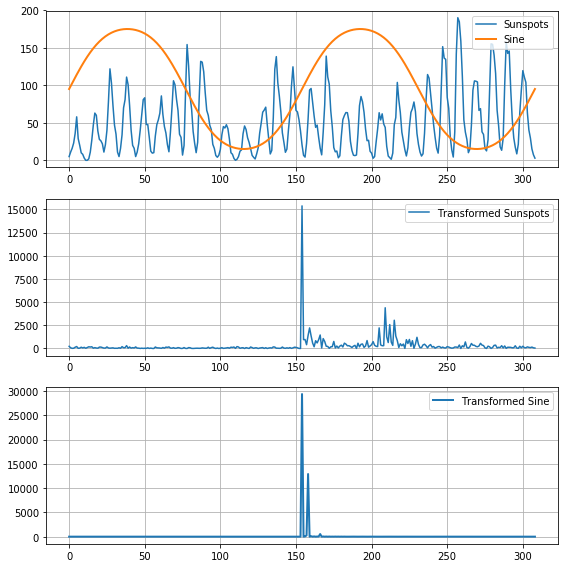

In [36]:
fig = plt.figure(figsize = (8, 8))

plt.subplot(311)
plt.plot(sunspots, label="Sunspots")  # sunspots
plt.plot(sine, lw=2, label="Sine")  # sine
plt.grid(True)
plt.legend()

plt.subplot(312)
plt.plot(transformed, label="Transformed Sunspots")  # sunspots 的 FFT 結果
plt.grid(True)
plt.legend()

plt.subplot(313)
plt.plot(sine_fft, lw=2, label="Transformed Sine")  #  mid + mid * np.sin(np.sin(t)) 的 FFT 結果
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## 7.10 譜分析

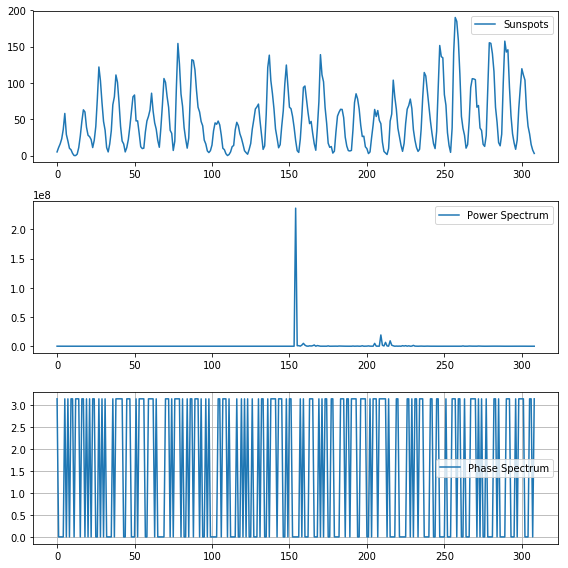

In [37]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
transformed = fftshift(rfft(sunspots))

fig = plt.figure(figsize = (8, 8))

plt.subplot(311)
plt.plot(sunspots, label="Sunspots")
plt.legend()

plt.subplot(312)
plt.plot(transformed ** 2, label="Power Spectrum")  # 平方就是 功率頻譜
plt.legend()

plt.subplot(313)
plt.plot(np.angle(transformed), label="Phase Spectrum")  # np.angle() 相位角度
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## 7.11 濾波

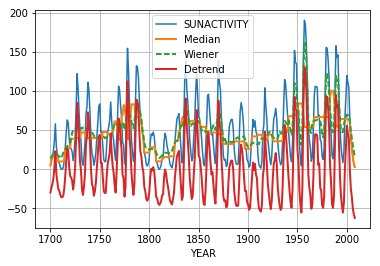

In [38]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.signal import wiener
from scipy.signal import detrend
import numpy as np

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values

plt.plot(years, sunspots, label="SUNACTIVITY")

plt.plot(years, medfilt(sunspots, 11), lw=2, label="Median")  # medfilt 濾波
plt.plot(years, wiener(sunspots, 11), '--', lw=2, label="Wiener")  # wiener 濾波
plt.plot(years, detrend(sunspots), lw=2, label="Detrend")  # detrend 濾波

plt.xlabel("YEAR")
plt.grid(True)
plt.legend()
plt.show()